# Вопрос 3

Что лучше: две модели случайного леса по 500 деревьев или одна модель на 1000 деревьев, если все параметры, кроме количества деревьев, одинаковы?

## Ответ

Если мы сравниваем две модели случайного леса по 500 деревьев каждая с одной моделью в 1000 деревьев, то целесообразнее использовать одну большую модель в 1000 деревьев:

- Случайный лес — это ансамблевый метод, который объединяет результаты множества деревьев. Чем больше деревьев в одном случайном лесу, тем более "устойчивым" может стать итоговый прогноз.
- Две отдельные модели по 500 деревьев — это фактически два разных ансамбля. Чтобы получить итоговый ответ, нужно было бы как-то объединять результаты обеих моделей, что увеличивает сложность процесса и может внести дополнительную вариативность.
- Одна большая модель на 1000 деревьев обычно даст более устойчивые и сглаженные результаты, чем два ансамбля, которые потом придется сводить в единый итог. Это упростит решение задачи и снизит риск дополнительных ошибок при комбинировании.

Если все остальные параметры неизменны, использование одной модели с большим количеством деревьев будет чаще предпочтительным решением. Это даст более стабильный итог без лишних сложностей.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Генерируем синтетику.

In [2]:
X, y = make_classification(n_samples=2000, n_features=20, random_state=42)

RF на 1000 деревьев.

In [3]:
rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_1000.fit(X, y)
y_prob_1000 = rf_1000.predict_proba(X)[:,1]
auc_1000 = roc_auc_score(y, y_prob_1000)

2 RF на 500 деревьев.

In [4]:
rf_500_a = RandomForestClassifier(n_estimators=500, random_state=0)
rf_500_b = RandomForestClassifier(n_estimators=500, random_state=10)

rf_500_a.fit(X, y)
rf_500_b.fit(X, y)

y_prob_500_a = rf_500_a.predict_proba(X)[:,1]
y_prob_500_b = rf_500_b.predict_proba(X)[:,1]

Для объединения усредняем вероятности.

In [5]:
y_prob_ensemble = (y_prob_500_a + y_prob_500_b) / 2.0
auc_ensemble = roc_auc_score(y, y_prob_ensemble)

In [6]:
print(f'AUC for 1000 trees: {auc_1000}')
print(f'AUC 2 x 500 trees: {auc_ensemble}')

AUC for 1000 trees: 1.0
AUC 2 x 500 trees: 1.0


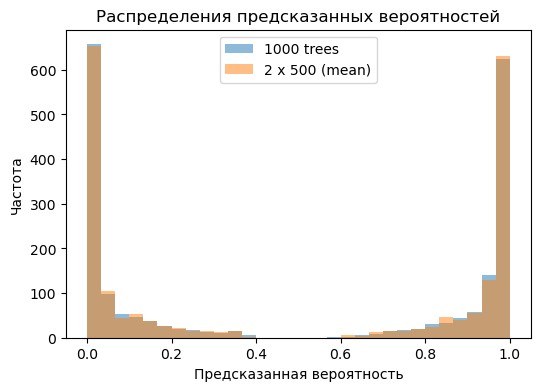

In [7]:
plt.figure(figsize=(6,4))
plt.hist(y_prob_1000, bins=30, alpha=0.5, label='1000 trees')
plt.hist(y_prob_ensemble, bins=30, alpha=0.5, label='2 x 500 (mean)')
plt.title('Распределения предсказанных вероятностей')
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Частота')
plt.legend()
plt.show()

Во многих случаях одна модель на 1000 деревьев лучше, чем 2 по 500, также при использовании одной модели мы избегаем этапа объединения результатов.